# Hedging 

## Apple Inc with S&P500

In [4]:
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [5]:
# Get data for the specified period for apple and spy
start = '2016-01-01'
end = '2017-01-01'
asset = get_pricing('AAPL', fields='price', start_date=start, end_date=end)
benchmark = get_pricing('SPY', fields='price', start_date=start, end_date=end)

In [7]:
# Asset returns 
asset_ret = asset.pct_change()[1:]
bench_ret = benchmark.pct_change()[1:]

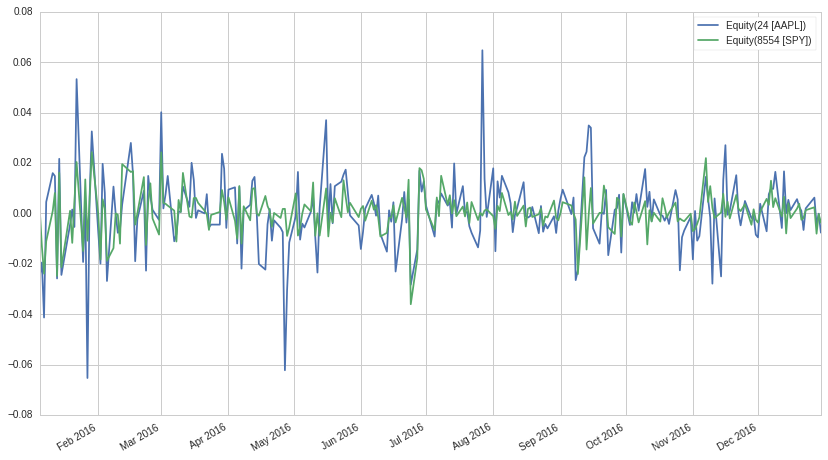

In [8]:
asset_ret.plot()
bench_ret.plot()
plt.legend()

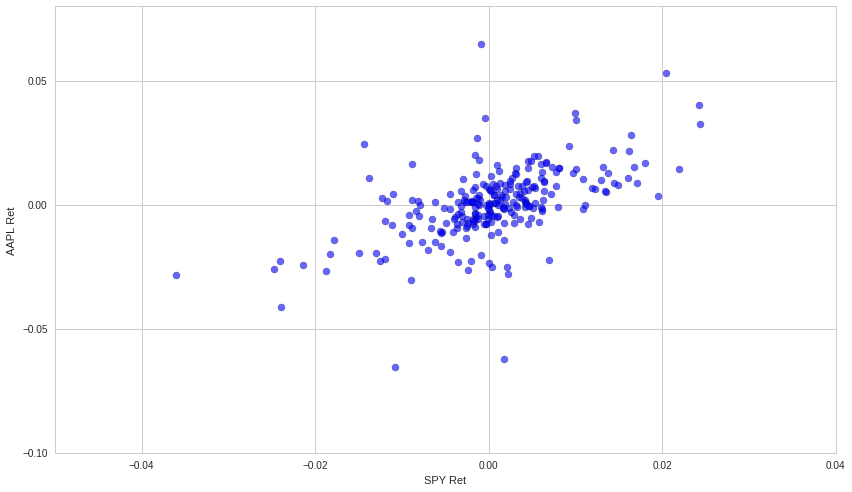

In [9]:
# use hedging to isloate alpha as seen from the SPY ups and downs 
# create scatter plot 
plt.scatter(bench_ret,asset_ret,alpha = 0.6, s= 50)
plt.xlabel('SPY Ret')
plt.ylabel('AAPL Ret')

In [10]:
# fit regression line 
AAPL = asset_ret.values
SPY = bench_ret.values 

In [11]:
# add constant 
spy_constant = sm.add_constant(SPY)

In [12]:
spy_constant

array([[  1.00000000e+00,   2.08867996e-03],
       [  1.00000000e+00,  -1.30080229e-02],
       [  1.00000000e+00,  -2.39439732e-02],
       [  1.00000000e+00,  -1.10285796e-02],
       [  1.00000000e+00,   9.36837959e-04],
       [  1.00000000e+00,   8.12052627e-03],
       [  1.00000000e+00,  -2.47878081e-02],
       [  1.00000000e+00,   1.61518905e-02],
       [  1.00000000e+00,  -2.13674304e-02],
       [  1.00000000e+00,   1.06613287e-03],
       [  1.00000000e+00,  -1.17041046e-02],
       [  1.00000000e+00,   4.84924457e-03],
       [  1.00000000e+00,   2.04031384e-02],
       [  1.00000000e+00,  -1.49065659e-02],
       [  1.00000000e+00,   1.34828403e-02],
       [  1.00000000e+00,  -1.08329037e-02],
       [  1.00000000e+00,   5.36989277e-03],
       [  1.00000000e+00,   2.43189821e-02],
       [  1.00000000e+00,  -3.58523096e-04],
       [  1.00000000e+00,  -1.82806871e-02],
       [  1.00000000e+00,   5.63038258e-03],
       [  1.00000000e+00,   1.82710852e-03],
       [  

In [13]:
model = regression.linear_model.OLS(AAPL,spy_constant).fit()

In [14]:
model.params

array([  1.67990248e-05,   1.02981370e+00])

In [16]:
alpha,beta= model.params

In [17]:
alpha

1.6799024809993564e-05

In [18]:
beta

1.0298136979465768

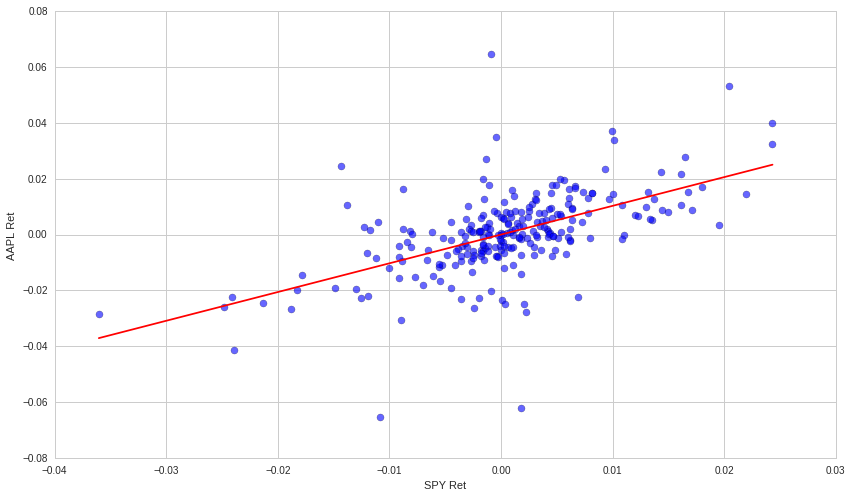

In [19]:
# plot this data for better understanding 
min_spy = bench_ret.values.min()
max_spy = bench_ret.values.max()

spy_line = np.linspace(min_spy,max_spy,100)
y = spy_line*beta + alpha
plt.plot(spy_line,y,'r')

plt.scatter(bench_ret,asset_ret,alpha = 0.6, s= 50)
plt.xlabel('SPY Ret')
plt.ylabel('AAPL Ret')

In [20]:
# implement a Hedge  
hedged = -1*beta*bench_ret + asset_ret

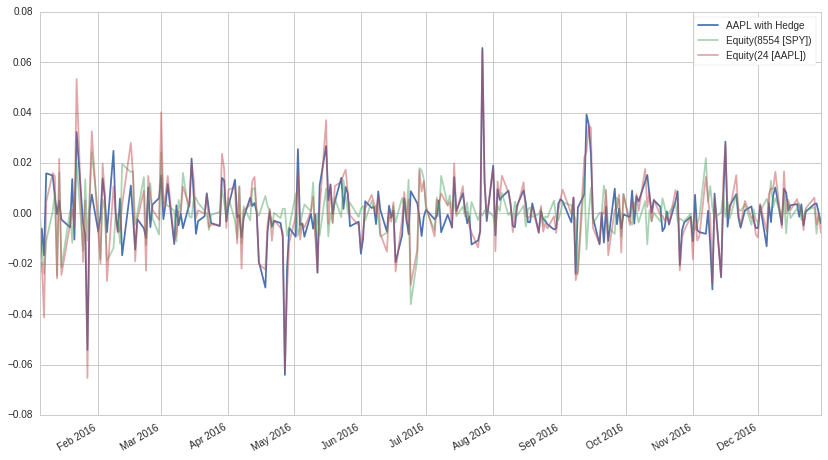

In [21]:
# plot the hedge
hedged.plot(label='AAPL with Hedge')
bench_ret.plot(alpha=0.5)
asset_ret.plot(alpha=0.5)
plt.legend()

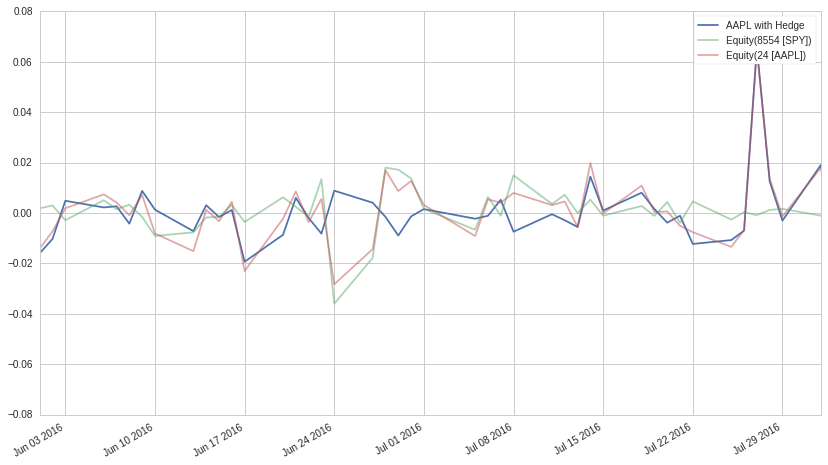

In [22]:
# specific period of time 

hedged.plot(label='AAPL with Hedge')
bench_ret.plot(alpha=0.5)
asset_ret.plot(alpha=0.5)
plt.xlim(['2016-06-01', '2016-08-01'])
plt.legend()

## Effects of Hedging 

In [23]:
def alpha_beta(benchmark_ret,stock):
    
    benchmark = sm.add_constant(benchmark_ret)
    
    model = regression.linear_model.OLS(stock,benchmark).fit()
    
    return model.params[0], model.params[1]

## Alpha and Beta Estimates

In [24]:
start = '2016-01-01'
end = '2017-01-01'

asset2016 = get_pricing('AAPL', fields='price', start_date=start, end_date=end)
benchmark2016 = get_pricing('SPY', fields='price', start_date=start, end_date=end)

asset_ret2016 = asset2016.pct_change()[1:]
benchmark_ret2016 = benchmark2016.pct_change()[1:]

aret_val = asset_ret2016.values
bret_val = benchmark_ret2016.values

alpha2016, beta2016 = alpha_beta(bret_val,aret_val)

print('2016 Based Figures')
print('alpha: ' + str(alpha2016))
print('beta: ' + str(beta2016))

2016 Based Figures
alpha: 1.679902481e-05
beta: 1.02981369795


## Create the Portfolio

In [34]:
portfolio = -1*beta2016*benchmark_ret2016 + asset_ret2016

alpha, beta = alpha_beta(benchmark_ret2016,portfolio)
print('Portfolio with Alphas and Betas:')
print('alpha: ' + str(alpha))
print('beta: ' + str(beta))
# completely trading on alpha because of beta extremely small

Portfolio with Alphas and Betas:
alpha: 1.679902481e-05
beta: 1.36609473733e-16


## Plot the returns on Portfolio and Asset 

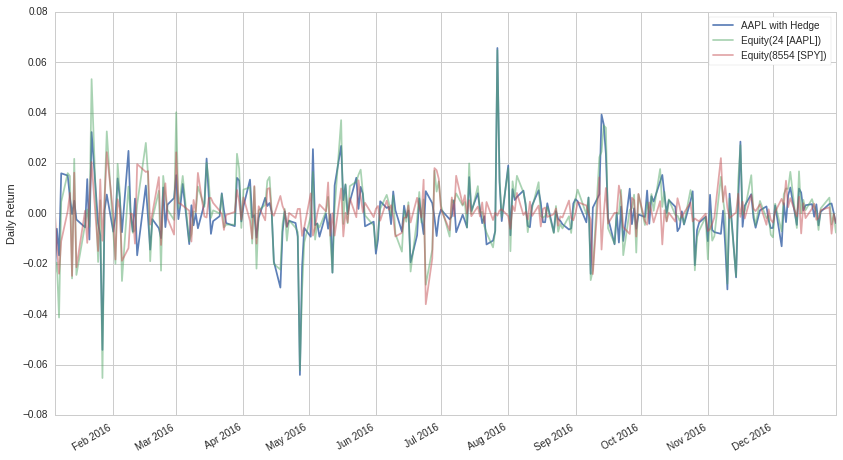

In [28]:
portfolio.plot(alpha=0.9,label='AAPL with Hedge')
asset_ret2016.plot(alpha=0.5);
benchmark_ret2016.plot(alpha=0.5)
plt.ylabel("Daily Return")
plt.legend();

In [30]:
portfolio.mean()

1.6799024809993652e-05

In [31]:
asset_ret2016.mean()

0.000574549568770769

In [32]:
portfolio.std()

0.012065447808277703

In [33]:
asset_ret2016.std()

0.014702747344261722

## Create Portfolio based of the 2016 Beta Value

In [35]:
# Get data for a different time frame to use previous Beta Value 
start = '2017-01-01'
end = '2017-08-01'

asset2017 = get_pricing('AAPL', fields='price', start_date=start, end_date=end)
benchmark2017 = get_pricing('SPY', fields='price', start_date=start, end_date=end)

asset_ret2017 = asset2017.pct_change()[1:]
benchmark_ret2017 = benchmark2017.pct_change()[1:]

aret_val = asset_ret2017.values
bret_val = benchmark_ret2017.values

alpha2017, beta2017 = alpha_beta(bret_val,aret_val)

print('2016 Based Figures')
print('alpha: ' + str(alpha2017))
print('beta: ' + str(beta2017))

2016 Based Figures
alpha: 0.000968854542346
beta: 1.26769880296


In [36]:
# create the portfolio and get alpha and beta
portfolio = -1*beta2016*benchmark_ret2017 + asset_ret2017

alpha, beta = alpha_beta(benchmark_ret2017,portfolio)
print 'Portfolio with Alphas and Betas Out of Sample:'
print 'alpha: ' + str(alpha)
print 'beta: ' + str(beta)

Portfolio with Alphas and Betas Out of Sample:
alpha: 0.000968854542346
beta: 0.23788510501


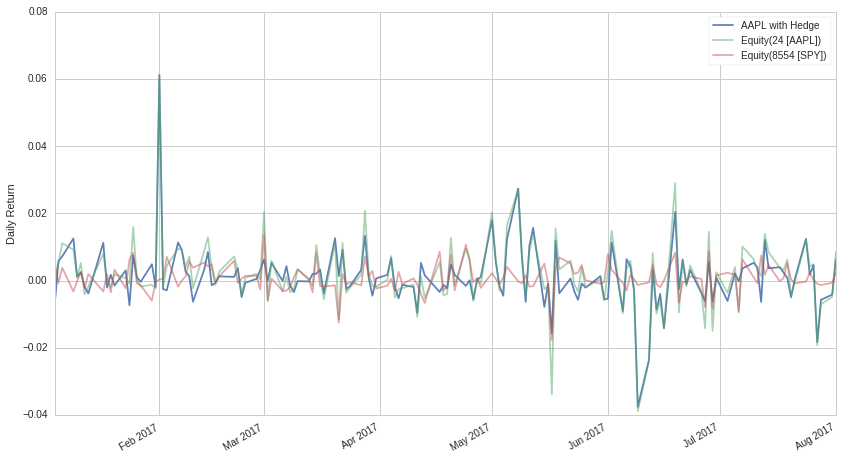

In [37]:
# plot the returns and the asset
portfolio.plot(alpha=0.9,label='AAPL with Hedge')
asset_ret2017.plot(alpha=0.5);
benchmark_ret2017.plot(alpha=0.5)
plt.ylabel("Daily Return")
plt.legend();

### What are the effects?
### Typically sacrificing average returns for less volatility, but this is also highly dependent on the security: In our case becasue apple has a very large MArket Cap in the S&P500 will have strong beta values

In [38]:
portfolio.mean()

0.0011399935632582228

In [39]:
asset_ret2017.mean()

0.0018808609159293456

In [40]:
portfolio.std()

0.009066375411652783

In [41]:
asset_ret2017.std()

0.010484461271996029